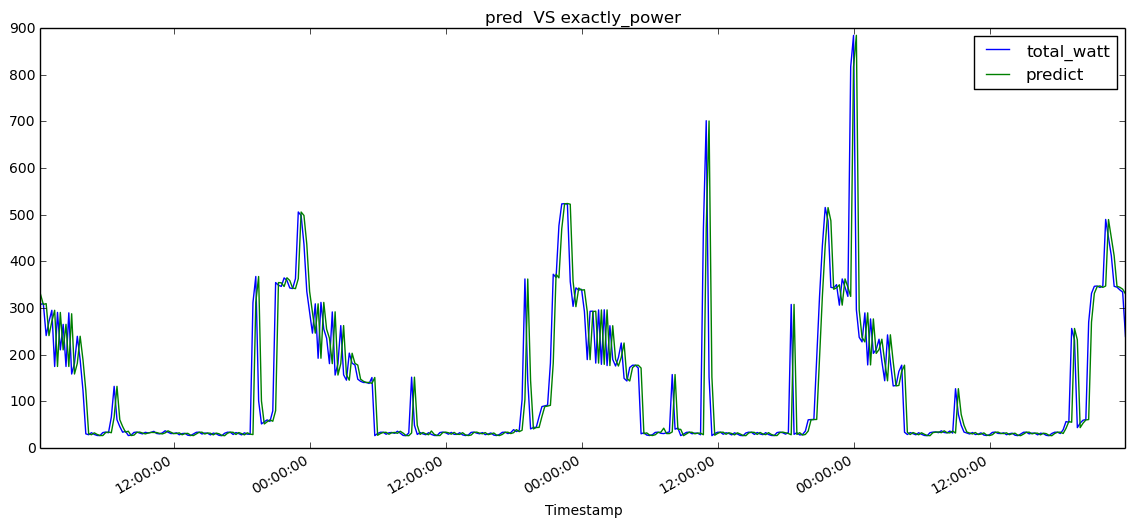

In [3]:
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import numpy as np
import time
import sys
import datetime 
from datetime import datetime
from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_predict = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2017-01-02 00:00:00","2017-01-05 23:59:59")
query = "SELECT Timestamp, total_watt FROM thesis.load WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2017-01-02 00:00:00","2017-01-05 23:59:59")


df_predict   = pd.read_sql( query_predict , conn , index_col=['Timestamp'])
df = pd.read_sql(query, conn , index_col=['Timestamp'])

df['predict'] = df_predict.total_watt

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('pred  VS exactly_power')
df.plot(ax=ax)
plt.show()


In [4]:
print df

                     total_watt   predict
Timestamp                                
2017-01-02 00:14:59    307.9130  329.5420
2017-01-02 00:29:59    309.5540  307.8300
2017-01-02 00:44:59    241.0210  309.4780
2017-01-02 00:59:59    271.3750  240.9050
2017-01-02 01:14:59    295.2080  271.3290
2017-01-02 01:29:59    174.7960  295.2590
2017-01-02 01:44:59    290.7420  174.8140
2017-01-02 01:59:59    210.3870  290.5890
2017-01-02 02:14:59    265.0500  210.4210
2017-01-02 02:29:59    174.8330  265.1670
2017-01-02 02:44:59    289.7580  174.7810
2017-01-02 02:59:59    158.6750  287.8010
2017-01-02 03:14:59    181.6130  158.7230
2017-01-02 03:29:59    239.4750  181.6070
2017-01-02 03:44:59    189.0000  239.5990
2017-01-02 03:59:59    123.2130  188.9920
2017-01-02 04:14:59     30.4625  123.2170
2017-01-02 04:29:59     28.5875   30.7151
2017-01-02 04:44:59     32.8458   28.5676
2017-01-02 04:59:59     29.2125   32.5842
2017-01-02 05:14:59     26.9958   29.2012
2017-01-02 05:29:59     26.7958   

In [6]:
##### EXPANDING 
from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE_predict = (np.abs((df.total_watt-df_predict.total_watt)/df.total_watt))*100
MAPE_predict  = np.mean(df.APE_predict )
# df.to_csv('out.csv')


print "Prediction ________________________________"
print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE_predict, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_predict.total_watt) , " Day =", len(df_predict.total_watt)/96

Prediction ________________________________
% MEAN ABSOLUTE PERCENT ERROR : 29.1313801978 %
Size of Data_excatly_load:  2976  Day = 31
Size of Data_pred_load   :  2976  Day = 31


                            OLS Regression Results                            
Dep. Variable:             total_watt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 4.317e+04
Date:                Mon, 29 May 2017   Prob (F-statistic):               0.00
Time:                        15:24:37   Log-Likelihood:            -1.0224e+05
No. Observations:               17472   AIC:                         2.045e+05
Df Residuals:                   17470   BIC:                         2.045e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6294      0.832     24.782      0.0

(-0.5, 1500)

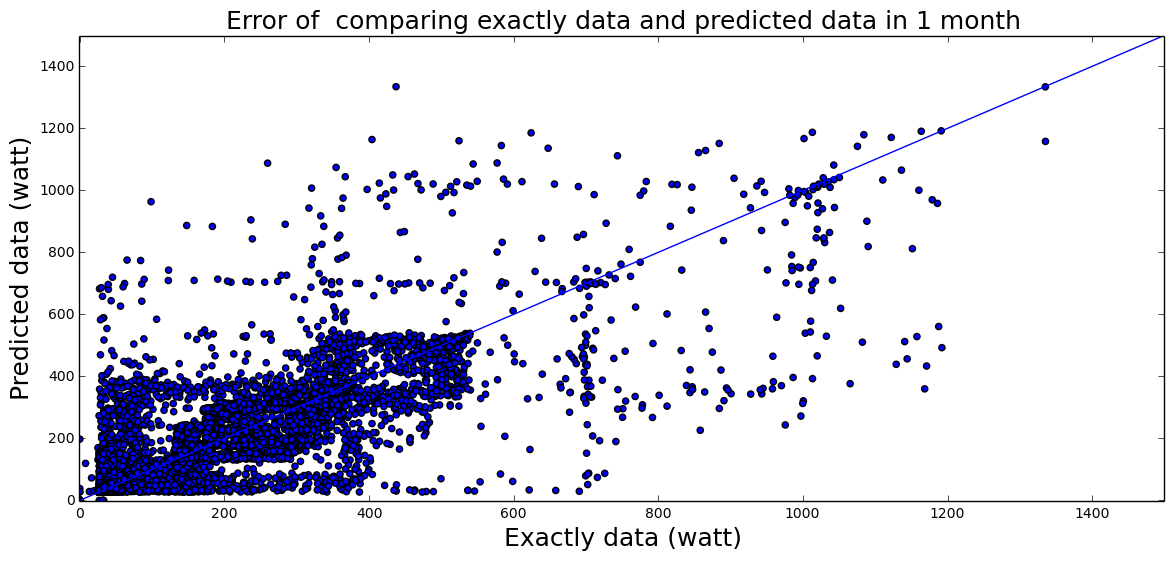

In [10]:
### EAPANDING
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline 
%matplotlib inline 

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query1 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2017-03-31 23:59:59")
df1 = pd.read_sql(query1 , conn , index_col=['Timestamp'])

query = "SELECT Timestamp, total_watt FROM thesis.load WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2017-03-31 23:59:59")
df = pd.read_sql(query, conn , index_col=['Timestamp'])

X = df1.total_watt
Y = df.total_watt

results = sm.OLS(Y,sm.add_constant(X)).fit()
print results.summary()
plt.figure(figsize=(14,6))
plt.scatter(X,Y)
X_plot = np.linspace(0,3600,3600)
plt.plot(X_plot)
# plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
plt.title('Error of  comparing exactly data and predicted data in 1 month',fontsize=18)
plt.xlabel('Exactly data (watt)',fontsize=18)
plt.ylabel('Predicted data (watt)',fontsize=18)
# plt.show()
plt.ylim((-0.5,1500))
plt.xlim((-0.5,1500))

In [8]:
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import numpy as np
import time
import sys
import datetime 
from datetime import datetime
from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_predict1 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-10-01 00:00:00","2016-10-31 23:59:59")
df1 = pd.read_sql(query_predict1, conn , index_col=['Timestamp'])
print "total predict watt month_1st =",df1.total_watt.sum()/1000

query_predict2 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-11-01 00:00:00","2016-11-30 23:59:59")
df2 = pd.read_sql(query_predict2, conn , index_col=['Timestamp'])
print "total predict watt month_2nd =",df2.total_watt.sum()/1000

query_predict3 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2016-12-01 00:00:00","2016-12-31 23:59:59")
df3 = pd.read_sql(query_predict3, conn , index_col=['Timestamp'])
print "total predict watt month_3rd =",df3.total_watt.sum()/1000

query_predict4 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2017-01-01 00:00:00","2017-01-31 23:59:59")
df4 = pd.read_sql(query_predict4, conn , index_col=['Timestamp'])
print "total predict watt month_4th =",df4.total_watt.sum()/1000

query_predict5 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2017-02-01 00:00:00","2017-02-28 23:59:59")
df5 = pd.read_sql(query_predict5, conn , index_col=['Timestamp'])
print "total predict watt month_5th =",df5.total_watt.sum()/1000

query_predict6 = "SELECT * FROM thesis.prediction_6month WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2017-03-01 00:00:00","2017-03-31 23:59:59")
df6 = pd.read_sql(query_predict6, conn , index_col=['Timestamp'])
print "total predict watt month_6th =",df6.total_watt.sum()/1000

total predict watt month_1st = 382.9847962
total predict watt month_2nd = 386.2071516
total predict watt month_3rd = 405.36069708
total predict watt month_4th = 399.7487256
total predict watt month_5th = 342.682739753
total predict watt month_6th = 390.4630029
